# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, InputLayer, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

ibm_dataset = pd.read_csv(
    'IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
print(ibm_dataset.shape)
ibm_dataset.head()

(3020, 6)


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


(2416,)
(604,)


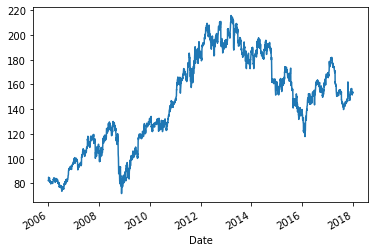

In [653]:
ibm_dataset_col = ibm_dataset['Close']
ibm_dataset_col.plot()

training_data_length = int(len(ibm_dataset_col)*0.8)

ibm_dataset_train = ibm_dataset_col.iloc[:training_data_length]
ibm_dataset_test = ibm_dataset_col.iloc[training_data_length:]

print(ibm_dataset_train.shape)
print(ibm_dataset_test.shape)

In [654]:
# Performing MinMaxScalar on the 'Close' 
scaler = MinMaxScaler(feature_range=(0, 1))
ibm_dataset_train_scaled = scaler.fit_transform(
    ibm_dataset_train.values.reshape(-1, 1))
ibm_dataset_train_scaled.shape


(2416, 1)

In [655]:
# Function to implement sliding window
def sliding_window(data, window_size):
  data_x = []
  data_y = []

  for i in range(window_size, len(data)):
    data_x.append(data[i-window_size:i, 0])
    data_y.append(data[i, 0])

  data_x, data_y = np.array(data_x), np.array(data_y)

  data_x = data_x.reshape(data_x.shape[0], data_x.shape[1], 1)

  return data_x, data_y

In [656]:
# Preparing (Sliding Window and Reshaping) the training dataset
window_size = 16
ibm_dataset_train_x, ibm_dataset_train_y = sliding_window(
    ibm_dataset_train_scaled, window_size)

print(ibm_dataset_train_x.shape)
print(ibm_dataset_train_y.shape)

(2400, 16, 1)
(2400,)


In [657]:
# Preparing (Normalizing and Reshaping) the testing dataset
ibm_dataset_test_values = ibm_dataset_test.values
ibm_dataset_concat = pd.concat((ibm_dataset_train, ibm_dataset_test), axis = 0)
ibm_dataset_train_length = len(ibm_dataset_train)

print(ibm_dataset_train.shape,ibm_dataset_test.shape)
print(ibm_dataset_train_x.shape,ibm_dataset_train_y.shape)

dataset_values = ibm_dataset_concat[ibm_dataset_train_length - window_size:].values
dataset_values = dataset_values.reshape(-1, 1)
dataset_values = scaler.transform(dataset_values)

(2416,) (604,)
(2400, 16, 1) (2400,)


In [658]:
# Preparing the test x dataset
print(dataset_values.shape)
# print(dataset_values)
ibm_dataset_test_x = []
for i in range(window_size, len(dataset_values)):
    ibm_dataset_test_x.append(dataset_values[i - window_size:i, 0])

ibm_dataset_test_x = np.array(ibm_dataset_test_x)
ibm_dataset_test_x = ibm_dataset_test_x.reshape(ibm_dataset_test_x.shape[0],ibm_dataset_test_x.shape[1],1)

(620, 1)


# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [659]:
# Feed - forward neural network with sliding window
feed_forward_model = Sequential()

feed_forward_model.add(Flatten(input_shape = (ibm_dataset_train_x.shape[1], 1)))
feed_forward_model.add(Dense(8, activation = "relu"))
feed_forward_model.add(Dense(1, activation = "linear"))
feed_forward_model.summary()


Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 16)                0         
                                                                 
 dense_151 (Dense)           (None, 8)                 136       
                                                                 
 dense_152 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [660]:
# Compiling and fitting the model
feed_forward_model.compile(
    optimizer='adam', loss='mean_squared_error', metrics="mse")
feed_forward_history = feed_forward_model.fit(
    ibm_dataset_train_x, ibm_dataset_train_y, epochs=100)

Epoch 1/100
75/75 [==============================] - 2s 5ms/step - loss: 0.0014 - mse: 0.0014
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 9.7254e-04 - mse: 9.7254e-04
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 8.1202e-04 - mse: 8.1202e-04
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 7.4298e-04 - mse: 7.4298e-04
Epoch 7/100
75/75 [==============================] - 0s 4ms/step - loss: 7.0317e-04 - mse: 7.0317e-04
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 6.4295e-04 - mse: 6.4295e-04
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 5.8494e-04 - mse: 5.8494e-04
Epoch 10/100
75/75 [==============================] - 0s 5ms/step - loss: 5.4139e-04 - mse: 5.4139e-04
Epo

In [661]:
# Predicting prices with the model
feed_forward_predict = feed_forward_model.predict(ibm_dataset_test_x)
feed_forward_predict = scaler.inverse_transform(feed_forward_predict)

19/19 [==============================] - 0s 2ms/step


(604,)
(604, 1)


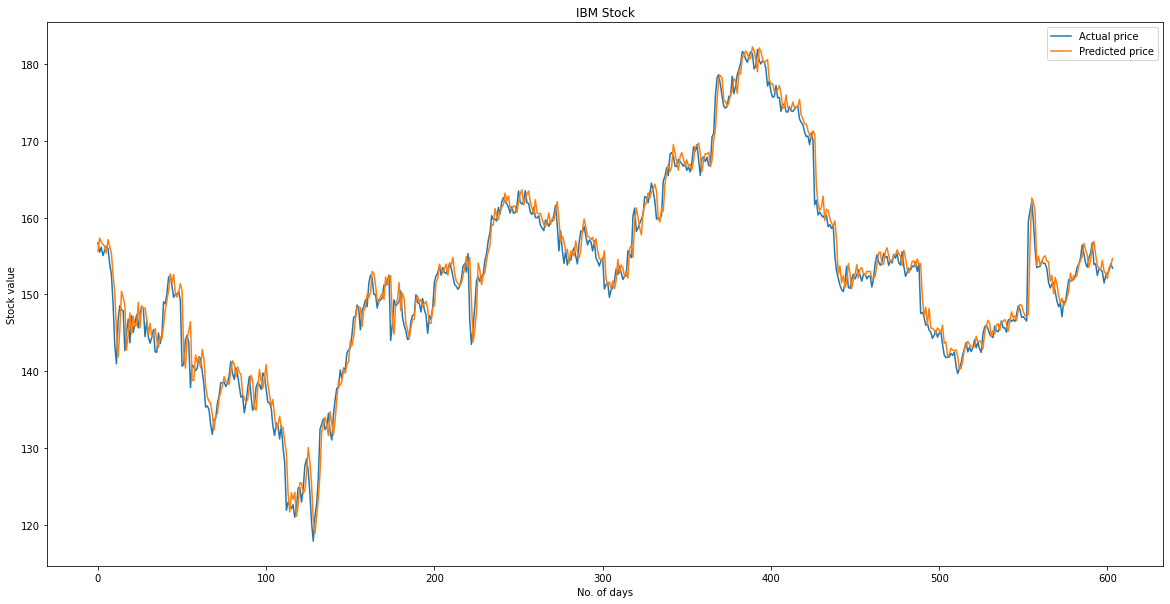

In [662]:
# Plotting the predictions
plt.figure(figsize=(20, 10))

print(ibm_dataset_test_values.shape)
print(feed_forward_predict.shape)

plt.plot(ibm_dataset_test_values, label = "Actual price")
plt.plot(feed_forward_predict, label = "Predicted price")
plt.title("IBM Stock")
plt.xlabel("No. of days")
plt.ylabel("Stock value")
plt.legend()
plt.show()

## Subtask 3

Perform prediction by using RNN

In [663]:
# Recurrent neural network
reccurent_model = Sequential()
reccurent_model.add(SimpleRNN(units=32, input_shape=(
    ibm_dataset_train_x.shape[1], 1), activation='tanh'))
reccurent_model.add(Dense(units=16, activation='tanh'))
reccurent_model.add(Dense(units=8, activation='tanh'))
reccurent_model.add(Dense(units=1, activation='linear'))
reccurent_model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_153 (Dense)           (None, 16)                528       
                                                                 
 dense_154 (Dense)           (None, 8)                 136       
                                                                 
 dense_155 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [664]:
# Compiling and fitting the model
reccurent_model.compile(optimizer='adam', loss='mean_squared_error', metrics="mse")
reccurent_history = reccurent_model.fit(ibm_dataset_train_x, ibm_dataset_train_y, epochs=100)


Epoch 1/100
75/75 [==============================] - 3s 7ms/step - loss: 0.0620 - mse: 0.0620
Epoch 2/100
75/75 [==============================] - 1s 10ms/step - loss: 0.0018 - mse: 0.0018
Epoch 3/100
75/75 [==============================] - 1s 14ms/step - loss: 9.9589e-04 - mse: 9.9589e-04
Epoch 4/100
75/75 [==============================] - 1s 11ms/step - loss: 7.3002e-04 - mse: 7.3002e-04
Epoch 5/100
75/75 [==============================] - 1s 11ms/step - loss: 6.4668e-04 - mse: 6.4668e-04
Epoch 6/100
75/75 [==============================] - 1s 9ms/step - loss: 6.2378e-04 - mse: 6.2378e-04
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 5.6784e-04 - mse: 5.6784e-04
Epoch 8/100
75/75 [==============================] - 1s 7ms/step - loss: 5.2781e-04 - mse: 5.2781e-04
Epoch 9/100
75/75 [==============================] - 1s 7ms/step - loss: 4.8122e-04 - mse: 4.8122e-04
Epoch 10/100
75/75 [==============================] - 1s 7ms/step - loss: 4.4255e-04 - mse: 4.

In [665]:
# Predicting prices with the model
reccurent_predict = reccurent_model.predict(ibm_dataset_test_x)
reccurent_predict = scaler.inverse_transform(reccurent_predict)

19/19 [==============================] - 1s 12ms/step


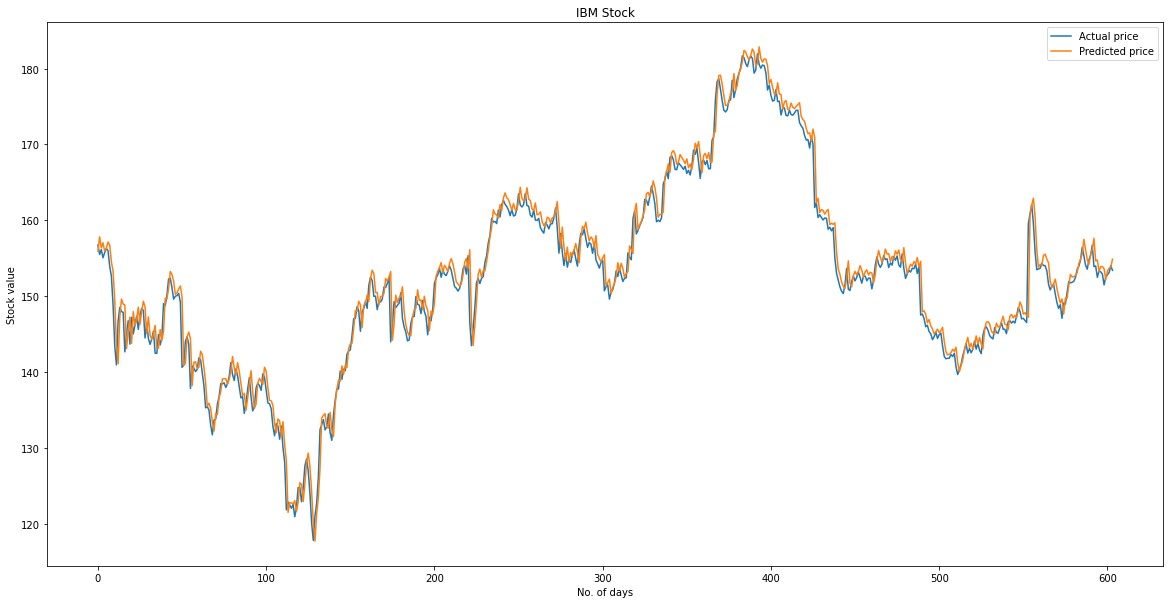

In [666]:
# Plotting the predictions
plt.figure(figsize=(20, 10))
plt.plot(ibm_dataset_test_values, label="Actual price")
plt.plot(reccurent_predict, label="Predicted price")
plt.title("IBM Stock")
plt.xlabel("No. of days")
plt.ylabel("Stock value")
plt.legend()
plt.show()

## Subtask 4

Perform prediction by using LSTM

In [667]:
# LSTM network
lstm_model = Sequential()
lstm_model.add(InputLayer(input_shape=(ibm_dataset_train_x.shape[1], 1)))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 16, 64)            128       
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_157 (Dense)           (None, 16)                528       
                                                                 
 dense_158 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


In [668]:
# Compiling and fitting the model
lstm_model.compile(optimizer='adam',loss='mean_squared_error', metrics="mse")
lstm_history = lstm_model.fit(ibm_dataset_train_x, ibm_dataset_train_y, epochs=100)

Epoch 1/100
75/75 [==============================] - 6s 11ms/step - loss: 0.0408 - mse: 0.0408
Epoch 2/100
75/75 [==============================] - 1s 11ms/step - loss: 8.1299e-04 - mse: 8.1299e-04
Epoch 3/100
75/75 [==============================] - 1s 13ms/step - loss: 6.0295e-04 - mse: 6.0295e-04
Epoch 4/100
75/75 [==============================] - 1s 13ms/step - loss: 4.7501e-04 - mse: 4.7501e-04
Epoch 5/100
75/75 [==============================] - 1s 12ms/step - loss: 4.4185e-04 - mse: 4.4185e-04
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 4.5076e-04 - mse: 4.5076e-04
Epoch 7/100
75/75 [==============================] - 1s 11ms/step - loss: 4.1818e-04 - mse: 4.1818e-04
Epoch 8/100
75/75 [==============================] - 1s 11ms/step - loss: 4.0053e-04 - mse: 4.0053e-04
Epoch 9/100
75/75 [==============================] - 1s 11ms/step - loss: 4.0122e-04 - mse: 4.0122e-04
Epoch 10/100
75/75 [==============================] - 1s 11ms/step - loss: 3.7582

In [669]:
# Predicting prices with the model
lstm_predict = lstm_model.predict(ibm_dataset_test_x)
lstm_predict = scaler.inverse_transform(lstm_predict)

19/19 [==============================] - 1s 7ms/step


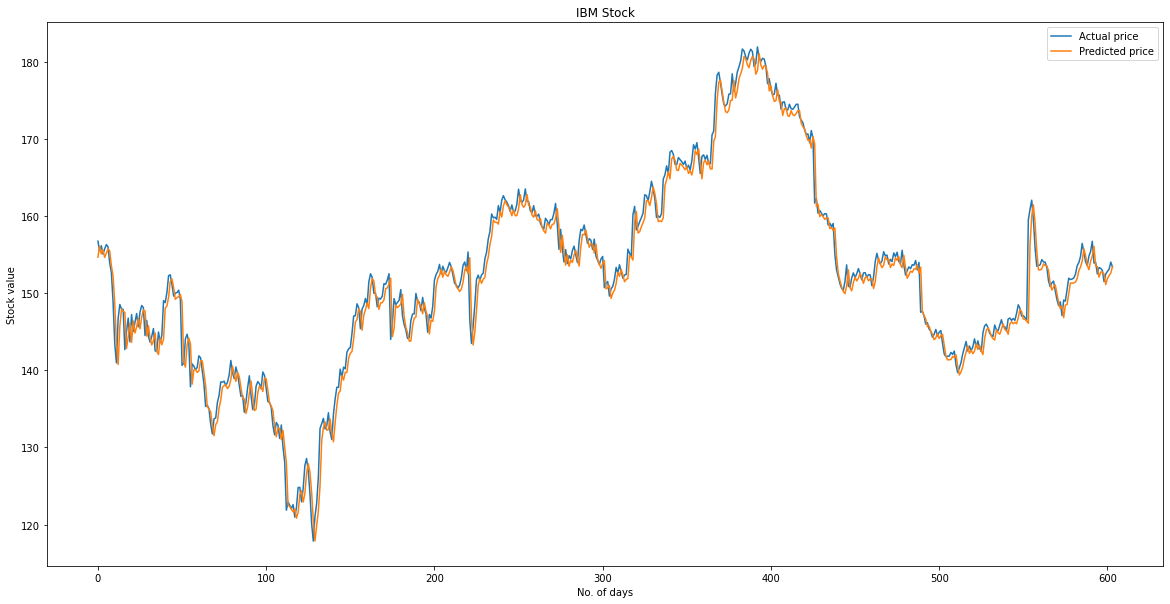

In [670]:
# Plotting the predictions
plt.figure(figsize=(20, 10))
plt.plot(ibm_dataset_test_values, label="Actual price")
plt.plot(lstm_predict, label="Predicted price")
plt.title("IBM Stock")
plt.xlabel("No. of days")
plt.ylabel("Stock value")
plt.legend()
plt.show()

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

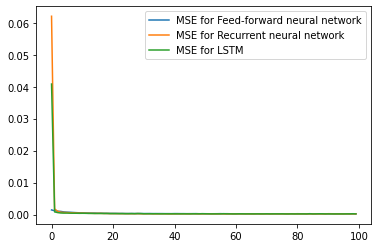

In [671]:
# Plotting MSE for the 3 models
plt.plot(feed_forward_history.history["mse"],
         label="MSE for Feed-forward neural network")
plt.plot(reccurent_history.history["mse"],
         label="MSE for Recurrent neural network")
plt.plot(lstm_history.history["mse"], label="MSE for LSTM")
plt.legend()

In [672]:
# Calculating mse for the 3 models
feed_forward_mse = mean_squared_error(
    ibm_dataset_test, feed_forward_predict.flatten())
reccurent_mse = mean_squared_error(ibm_dataset_test, reccurent_predict.flatten())
lstm_mse = mean_squared_error(ibm_dataset_test, lstm_predict.flatten())

print("Mean-square error for feed forward network", feed_forward_mse)
print("Mean-square error for recurrent network", reccurent_mse)
print("Mean-square error for LSTM network", lstm_mse)

print("LSTM networks with MSE:", lstm_mse, "appear to be the best architecture since it has the lowest error.")

Mean-square error for feed forward network 3.9684681079259407
Mean-square error for recurrent network 3.729116019962517
Mean-square error for LSTM network 3.5171846535563507
LSTM networks with MSE: 3.5171846535563507 appear to be the best architecture since it has the lowest error.
